In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
nifty = pd.read_csv("NIFTY.csv")
nifty

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,04 Nov 2024,24315.75,24316.75,23816.15,23995.35
1,NIFTY 50,01 Nov 2024,24302.75,24368.25,24280.2,24304.35
2,NIFTY 50,31 Oct 2024,24349.85,24372.45,24172.6,24205.35
3,NIFTY 50,30 Oct 2024,24371.45,24498.2,24307.3,24340.85
4,NIFTY 50,29 Oct 2024,24328.85,24484.5,24140.85,24466.85
...,...,...,...,...,...,...
8336,NIFTY 50,10 Jul 1990,-,-,-,288.69
8337,NIFTY 50,09 Jul 1990,-,-,-,289.69
8338,NIFTY 50,06 Jul 1990,-,-,-,289.04
8339,NIFTY 50,05 Jul 1990,-,-,-,284.04


In [3]:
nifty['Date'] = pd.to_datetime(nifty['Date'], format='%d %b %Y')
nifty.set_index('Date', inplace=True)
nifty['Open'] = pd.to_numeric(nifty['Open'], errors='coerce')
nifty['High'] = pd.to_numeric(nifty['High'], errors='coerce')
nifty['Low'] = pd.to_numeric(nifty['Low'], errors='coerce')
nifty = nifty.sort_index(ascending=True)
nifty.dropna(inplace=True)

In [8]:
nifty.head(10)

,Index Name,Open,High,Low,Close
Date,,,,,
1995-11-03,NIFTY 50,994.20,1000.91,992.69,1000.00
1995-11-06,NIFTY 50,1001.53,1001.53,988.92,988.92
1995-11-07,NIFTY 50,987.17,987.17,977.05,978.22
1995-11-08,NIFTY 50,976.28,976.28,962.98,964.01
1995-11-09,NIFTY 50,960.32,960.32,952.13,953.07
1995-11-10,NIFTY 50,951.93,951.93,946.00,948.82
1995-11-13,NIFTY 50,949.29,949.29,916.48,917.26
1995-11-14,NIFTY 50,916.66,916.66,897.52,902.56
1995-11-15,NIFTY 50,901.33,913.54,901.33,913.21


In [96]:
return_periods=[1,2,3,4,7,10,14,30,60,90,180,365]
returns_df=nifty.copy()
for period in return_periods:
    returns_df[f'{period}d_return']=nifty['Close'].pct_change(periods=period)*100

In [97]:
returns_df.head()

,Index Name,Open,High,Low,Close,1d_return,2d_return,3d_return,4d_return,7d_return,10d_return,14d_return,30d_return,60d_return,90d_return,180d_return,365d_return
Date,,,,,,,,,,,,,,,,,
1995-11-03,NIFTY 50,994.20,1000.91,992.69,1000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-11-06,NIFTY 50,1001.53,1001.53,988.92,988.92,-1.108000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-11-07,NIFTY 50,987.17,987.17,977.05,978.22,-1.081988,-2.178000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-11-08,NIFTY 50,976.28,976.28,962.98,964.01,-1.452638,-2.518910,-3.599000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-11-09,NIFTY 50,960.32,960.32,952.13,953.07,-1.134843,-2.570996,-3.625167,-4.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
returns_df.dropna().head()

,Index Name,Open,High,Low,Close,1d_return,2d_return,3d_return,4d_return,7d_return,10d_return,14d_return,30d_return,60d_return,90d_return,180d_return,365d_return
Date,,,,,,,,,,,,,,,,,
1997-04-25,NIFTY 50,1065.4,1071.05,1062.95,1069.40,0.206147,-0.154054,0.905831,0.829719,6.593571,3.795011,6.705248,-5.131958,8.469419,32.238559,5.368949,6.940000
1997-04-28,NIFTY 50,1068.6,1070.70,1061.20,1065.40,-0.374042,-0.168666,-0.527520,0.528402,4.975860,5.657758,5.417306,-1.232966,5.573998,32.644422,2.166262,7.733689
1997-04-29,NIFTY 50,1063.6,1065.40,1052.80,1057.45,-0.746199,-1.117449,-0.913606,-1.269782,2.149343,4.346754,5.639361,0.518061,3.488941,26.327547,2.008431,8.099405
1997-04-30,NIFTY 50,1081.1,1088.40,1075.95,1079.85,2.118303,1.356298,0.977183,1.185345,1.815010,7.635186,8.976688,0.525973,6.159064,30.534905,4.541406,12.016473
1997-05-02,NIFTY 50,1074.7,1074.70,1063.75,1069.00,-1.004769,1.092250,0.337901,-0.037404,0.868088,5.330574,3.756188,0.234412,6.900000,29.635468,3.556171,12.163849


In [99]:
# Create target variable (return after 1 month in future)
returns_df["Target_30D_return"] = -nifty["Close"].pct_change(periods=-15) * 100

In [100]:
returns_df.tail(30)

,Index Name,Open,High,Low,Close,1d_return,2d_return,3d_return,4d_return,7d_return,10d_return,14d_return,30d_return,60d_return,90d_return,180d_return,365d_return,Target_30D_return
Date,,,,,,,,,,,,,,,,,,
2024-09-23,NIFTY 50,25872.55,25956.00,25847.35,25939.05,0.574232,2.058759,2.212586,2.047717,2.166892,4.020829,2.607610,6.449369,7.879349,16.839673,19.723481,49.091709,-3.518728
2024-09-24,NIFTY 50,25921.45,26011.55,25886.85,25940.40,0.005205,0.579467,2.064070,2.217905,2.302763,3.591296,2.943406,6.544543,8.037284,15.785457,20.555738,47.749195,-3.880855
2024-09-25,NIFTY 50,25899.45,26032.80,25871.35,26004.15,0.245756,0.250973,0.826647,2.314899,2.444083,4.357013,3.416371,7.726708,7.713544,15.748394,20.063855,47.757988,-5.067910
2024-09-26,NIFTY 50,26005.40,26250.90,25998.40,26216.05,0.814870,1.062628,1.067888,1.648253,3.137472,3.257920,5.488056,8.583174,8.672745,16.505422,20.751193,48.751564,-5.479992
2024-09-27,NIFTY 50,26248.25,26277.35,26151.40,26178.95,-0.141516,0.672200,0.919608,0.924860,3.157909,3.243547,4.982876,6.673689,7.792189,16.200861,21.688979,47.717565,-5.640791
2024-09-30,NIFTY 50,26061.30,26134.70,25794.10,25810.85,-1.406092,-1.545618,-0.743343,-0.499414,1.554348,1.682573,3.073946,5.038936,6.208093,14.218419,19.800556,44.903831,-5.470515
2024-10-01,NIFTY 50,25788.45,25907.60,25739.20,25796.90,-0.054047,-1.459379,-1.598830,-0.796988,0.023070,1.488480,3.525300,4.445754,6.055990,12.318413,19.326787,44.698788,-5.571402
2024-10-03,NIFTY 50,25452.85,25639.45,25230.30,25250.10,-2.119635,-2.172536,-3.548080,-3.684575,-2.656034,-0.502216,-0.546696,1.937409,3.822076,9.988195,16.643723,42.600745,-3.486561
2024-10-04,NIFTY 50,25181.90,25485.05,24966.80,25014.60,-0.932670,-3.032535,-3.084943,-4.447657,-3.568950,-1.578546,-1.348372,0.818572,2.379549,9.079492,14.250350,41.644324,-3.448190


In [101]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7216 entries, 1995-11-03 to 2024-11-04
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index Name         7216 non-null   object 
 1   Open               7216 non-null   float64
 2   High               7216 non-null   float64
 3   Low                7216 non-null   float64
 4   Close              7216 non-null   float64
 5   1d_return          7215 non-null   float64
 6   2d_return          7214 non-null   float64
 7   3d_return          7213 non-null   float64
 8   4d_return          7212 non-null   float64
 9   7d_return          7209 non-null   float64
 10  10d_return         7206 non-null   float64
 11  14d_return         7202 non-null   float64
 12  30d_return         7186 non-null   float64
 13  60d_return         7156 non-null   float64
 14  90d_return         7126 non-null   float64
 15  180d_return        7036 non-null   float64
 16  365d_r

In [102]:
# Drop NaN values
data_clean = returns_df.dropna()
data_clean.head()

,Index Name,Open,High,Low,Close,1d_return,2d_return,3d_return,4d_return,7d_return,10d_return,14d_return,30d_return,60d_return,90d_return,180d_return,365d_return,Target_30D_return
Date,,,,,,,,,,,,,,,,,,
1997-04-25,NIFTY 50,1065.4,1071.05,1062.95,1069.40,0.206147,-0.154054,0.905831,0.829719,6.593571,3.795011,6.705248,-5.131958,8.469419,32.238559,5.368949,6.940000,-1.770080
1997-04-28,NIFTY 50,1068.6,1070.70,1061.20,1065.40,-0.374042,-0.168666,-0.527520,0.528402,4.975860,5.657758,5.417306,-1.232966,5.573998,32.644422,2.166262,7.733689,-1.384593
1997-04-29,NIFTY 50,1063.6,1065.40,1052.80,1057.45,-0.746199,-1.117449,-0.913606,-1.269782,2.149343,4.346754,5.639361,0.518061,3.488941,26.327547,2.008431,8.099405,-1.482726
1997-04-30,NIFTY 50,1081.1,1088.40,1075.95,1079.85,2.118303,1.356298,0.977183,1.185345,1.815010,7.635186,8.976688,0.525973,6.159064,30.534905,4.541406,12.016473,-4.112032
1997-05-02,NIFTY 50,1074.7,1074.70,1063.75,1069.00,-1.004769,1.092250,0.337901,-0.037404,0.868088,5.330574,3.756188,0.234412,6.900000,29.635468,3.556171,12.163849,-3.414917


In [103]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6836 entries, 1997-04-25 to 2024-10-14
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index Name         6836 non-null   object 
 1   Open               6836 non-null   float64
 2   High               6836 non-null   float64
 3   Low                6836 non-null   float64
 4   Close              6836 non-null   float64
 5   1d_return          6836 non-null   float64
 6   2d_return          6836 non-null   float64
 7   3d_return          6836 non-null   float64
 8   4d_return          6836 non-null   float64
 9   7d_return          6836 non-null   float64
 10  10d_return         6836 non-null   float64
 11  14d_return         6836 non-null   float64
 12  30d_return         6836 non-null   float64
 13  60d_return         6836 non-null   float64
 14  90d_return         6836 non-null   float64
 15  180d_return        6836 non-null   float64
 16  365d_r

In [104]:
# Define features and target
X = data_clean[[f"{period}d_return" for period in return_periods]]
y = data_clean["Target_30D_return"]

In [105]:
y.head()

Date
1997-04-25   -1.770080
1997-04-28   -1.384593
1997-04-29   -1.482726
1997-04-30   -4.112032
1997-05-02   -3.414917
Name: Target_30D_return, dtype: float64

In [106]:
# Split last 1 year as test data
split_date = X.index.max() - pd.DateOffset(years=1)

X_train = X[:split_date]
X_test = X[split_date:]

y_train = y[:split_date]
y_test = y[split_date:]


In [107]:
# Try different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

best_kernel = None
best_score = float('-inf')
best_model = None

for kernel in kernels:
    model = SVR(kernel=kernel)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)  # R-squared score

    print(f"Kernel: {kernel}, R2 Score: {score:.4f}")

    if score > best_score:
        best_score = score
        best_kernel = kernel
        best_model = model

print(f"Best Kernel: {best_kernel}, Best R2 Score: {best_score:.4f}")

# Predict with the best model
y_pred = best_model.predict(X_test)


Kernel: linear, R2 Score: 0.0303
Kernel: poly, R2 Score: 0.0091
Kernel: rbf, R2 Score: 0.0822
Kernel: sigmoid, R2 Score: -2829.1938
Best Kernel: rbf, Best R2 Score: 0.0822


In [108]:
# Convert to binary classification (Positive: 1, Negative: 0)
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (y_pred > 0).astype(int)

In [109]:
y_test_binary

Date
2023-10-16    0
2023-10-17    0
2023-10-18    0
2023-10-19    0
2023-10-20    0
             ..
2024-10-08    0
2024-10-09    0
2024-10-10    0
2024-10-11    0
2024-10-14    0
Name: Target_30D_return, Length: 248, dtype: int32

In [110]:
# Create DataFrame for actual and predicted values
y_results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Actual_Class": y_test_binary,
    "Predicted_Class": y_pred_binary
}, index=y_test.index)
y_results_df.tail(25)

,Actual,Predicted,Actual_Class,Predicted_Class
Date,,,,
2024-09-09,3.387916,0.596002,1,1
2024-09-10,2.929809,0.599710,1,1
2024-09-11,1.313460,0.531731,1,1
2024-09-12,-1.496326,0.752636,0,1
2024-09-13,-2.261476,0.733797,0,1
2024-09-16,-1.481621,0.551561,0,1
2024-09-17,-1.747662,0.132155,0,1
2024-09-18,-1.516494,-0.003059,0,0
2024-09-19,-1.808787,0.063219,0,1


In [111]:
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


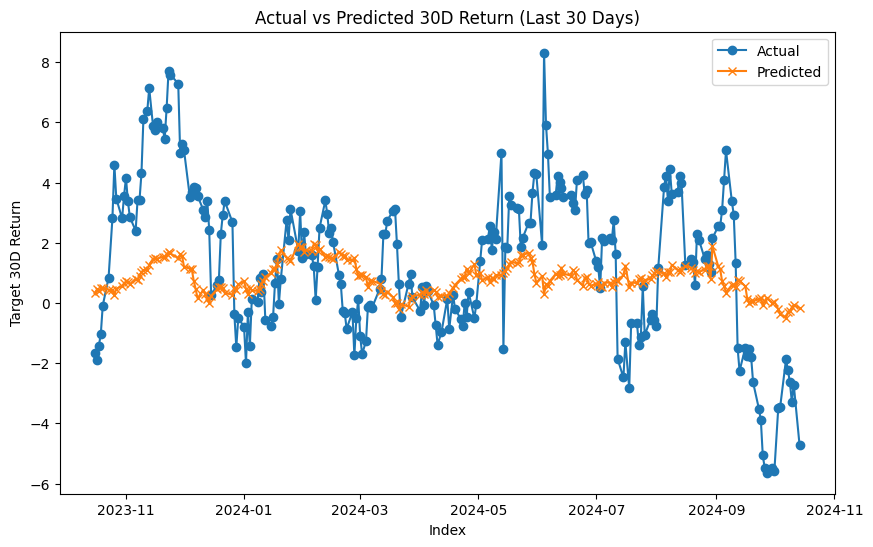

In [119]:
# Select last 30 days for plotting
# Using data of last 350 trading days,so wew can observe patterns clearly
y_test_last_30 = y_test[-350:]
y_pred_last_30 = y_pred[-350:]

# Plot Index vs Target for both Actual and Prediction (Last 30 Days)
plt.figure(figsize=(10, 6))
plt.plot(y_test_last_30.index, y_test_last_30, label="Actual", marker='o')
plt.plot(y_test_last_30.index, y_pred_last_30, label="Predicted", marker='x')
plt.xlabel("Index")
plt.ylabel("Target 30D Return")
plt.title("Actual vs Predicted 30D Return (Last 30 Days)")
plt.legend()
plt.show()
